<a href="https://colab.research.google.com/github/tarashagarwal/Analyzing-a-Global-Supply-Chain-Network/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [30]:
#Create a Mode Class that inhertis nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) --->
  #Hidden Layer1 (number of neurons) --->
  #H2 (n) -->
  #output (3 classes of iris flowers)

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [31]:
torch.manual_seed(41)
model = Model()

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [34]:
my_df['variety'] = my_df['variety'].replace({'Setosa':0.0, 'Versicolor':1.0, 'Virginica':2.0})
my_df

/tmp/ipython-input-1354793617.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace({'Setosa':0.0, 'Versicolor':1.0, 'Virginica':2.0})


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [35]:
#Train Test Split
x = my_df.drop('variety', axis=1)
y = my_df['variety']

In [36]:
# Comvert these to numpy arrays
x = x.values
y = y.values

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [39]:
#covert X features to float tensors
x_train = torch.FloatTensor(x_train)
x_test  = torch.FloatTensor(x_test)

In [40]:
#Convert y labesls to tensors long
y_train = torch.LongTensor(y_train)
y_test  = torch.LongTensor(y_test)

In [41]:
#Set Criteria for the model to measure the error, how far off the predictions are from the predictions
criterion = nn.CrossEntropyLoss()
#Choose Adam Optimizer, lr = learnign rate (if error doesn't go downb after a bunch of iterations (epocs) we have to lowe out learnign rate.)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [42]:
#Epochs? (one runs through the entire traing data)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(x_train) #Get Predicted Results

  #Measure the loss/error, and it is gonna be high at first
  loss = criterion(y_pred, y_train)

  #Keep Track of losses
  losses.append(loss.detach().numpy())

  #Print after every 10 epocs
  if i%10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propogation: take the error rate of forward propogation and feed it back
  #thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162347674369812
Epoch: 30 and loss: 0.585993230342865
Epoch: 40 and loss: 0.4003389775753021
Epoch: 50 and loss: 0.26794716715812683
Epoch: 60 and loss: 0.1796349585056305
Epoch: 70 and loss: 0.12165623158216476
Epoch: 80 and loss: 0.0860651507973671
Epoch: 90 and loss: 0.06522614508867264


Text(0.5, 0, 'Epochs')

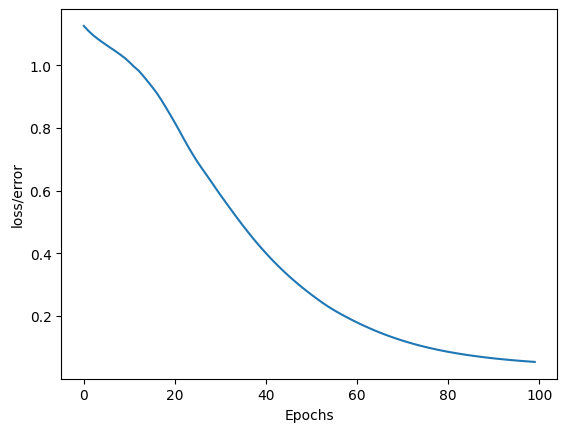

In [43]:
#Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('Epochs')